<a href="https://colab.research.google.com/github/calebebrim/geneticalgorithm/blob/master/Notebooks/Aplica%C3%A7%C3%A3o_Algoritmos_Gen%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando Ambiente
criado a aplicação



In [1]:
!git clone https://github.com/calebebrim/geneticalgorithm.git

Cloning into 'geneticalgorithm'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 138 (delta 4), reused 15 (delta 3), pack-reused 116
Receiving objects: 100% (138/138), 108.48 KiB | 9.86 MiB/s, done.
Resolving deltas: 100% (38/38), done.


Alterando a pasta raiz


In [2]:
%cd /content/geneticalgorithm
!ls

/content/geneticalgorithm
dist		     __init__.py  Makefile   README.md	src
geneticalgorithm.py  LICENCE	  Notebooks  setup.py


# Executando os exemplos

Minimization: 

$e =$ number count
$e =$ number count

$F(e) = min(\sum_{i=0}^e(n_i))$

having

$(n_i 𝛜 𝓝 | n<=10)$  


In [3]:
!make minimization

python -m src.examples.sum_minimization
nbits: 4
Generating Population With: 
	- Gene Size: 8
	- Population Size: 10
	- Population Type: <class 'bool'>
	- Generations: 1000
	- Generations for each ephoch: 100
	- Selection Count: 10
            
================(Epoch: 1 Generation: 100)=======================
{'max': 24, 'min': 1, 'avg': 10.4}
Best:  0
================(Epoch: 1 Generation: 100)=======================
================(Epoch: 2 Generation: 200)=======================
{'max': 22, 'min': 2, 'avg': 13.7}
Best:  0
================(Epoch: 2 Generation: 200)=======================
================(Epoch: 3 Generation: 300)=======================
{'max': 26, 'min': 6, 'avg': 15.0}
Best:  0
================(Epoch: 3 Generation: 300)=======================
================(Epoch: 4 Generation: 400)=======================
{'max': 25, 'min': 5, 'avg': 12.6}
Best:  0
================(Epoch: 4 Generation: 400)=======================
================(Epoch: 5 Generation: 500)=========

In [4]:
!make maximization

python -m src.examples.sum_maximization
nbits: 5
Generating Population With: 
	- Gene Size: 10
	- Population Size: 20
	- Population Type: <class 'bool'>
	- Generations: 1000
	- Generations for each ephoch: 100
	- Selection Count: 10
            
================(Epoch: 1 Generation: 100)=======================
{'max': 57, 'min': 8, 'avg': 39.0}
Best:  62
================(Epoch: 1 Generation: 100)=======================
================(Epoch: 2 Generation: 200)=======================
{'max': 58, 'min': 16, 'avg': 35.35}
Best:  62
================(Epoch: 2 Generation: 200)=======================
================(Epoch: 3 Generation: 300)=======================
{'max': 59, 'min': 16, 'avg': 34.8}
Best:  62
================(Epoch: 3 Generation: 300)=======================
================(Epoch: 4 Generation: 400)=======================
{'max': 59, 'min': 12, 'avg': 34.6}
Best:  62
================(Epoch: 4 Generation: 400)=======================
================(Epoch: 5 Generation: 500)

In [5]:
!make skills

python -m src.examples.skills_optimization
Generating Population With: 
	- Gene Size: 6
	- Population Size: 10
	- Population Type: <class 'bool'>
	- Generations: 1000
	- Generations for each ephoch: 100
	- Selection Count: 10
            
================(Epoch: 1 Generation: 100)=======================
{'max': 21, 'min': -2964, 'avg': -1077.2}
Best:  26
================(Epoch: 1 Generation: 100)=======================
================(Epoch: 2 Generation: 200)=======================
{'max': 26, 'min': -988, 'avg': -577.5}
Best:  26
================(Epoch: 2 Generation: 200)=======================
================(Epoch: 3 Generation: 300)=======================
{'max': 26, 'min': -2982, 'avg': -778.5}
Best:  26
================(Epoch: 3 Generation: 300)=======================
================(Epoch: 4 Generation: 400)=======================
{'max': 26, 'min': -988, 'avg': -878.9}
Best:  26
================(Epoch: 4 Generation: 400)=======================
================(Epoch: 5 Gene

# **O Problema: Caixeiro Viajante**


Definição: O Caixeiro precisa passar por todas as cidades da rota utilizando o menor trajeto. 

## Distâncias entre as cidades:

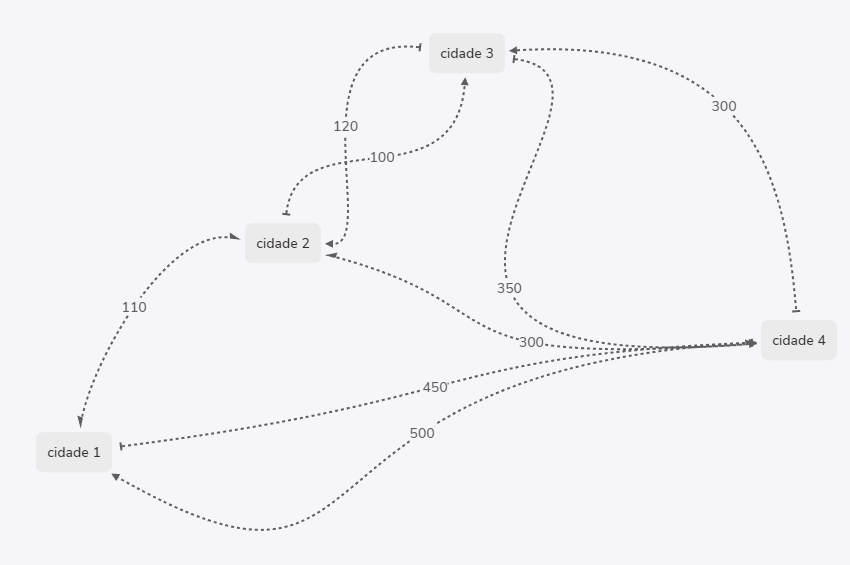




### Premiças


1.   Deve passar por todas as viagens
2.   Deve percorrer o menor caminho
3.   Assume que o caixeiro está sempre na primeira cidade do trajeto

## Modelagem do Problema

In [58]:
#@title Modelagem do Problema { run: "auto", vertical-output: true, display-mode: "form" }

import sys
import numpy as np
from src import GeneticAlgorithm
from src.utils.binary_ops import bitsNeededToNumber
from src.utils.binary_ops import bitsToBytes

dist1_2 = 110 #@param {type:"slider", min:-1, max:500, step:1}
dist1_3 = -1 #@param {type:"slider", min:-1, max:500, step:1}
dist1_4 = 450 #@param {type:"slider", min:-1, max:500, step:1}
dist2_1 = 110 #@param {type:"slider", min:-1, max:500, step:1}
dist2_3 = 101 #@param {type:"slider", min:-1, max:500, step:1}
dist2_4 = 300 #@param {type:"slider", min:-1, max:500, step:1}
dist3_1 = 70 #@param {type:"slider", min:-1, max:500, step:1}
dist3_2 = 139 #@param {type:"slider", min:-1, max:500, step:1}
dist3_4 = 350 #@param {type:"slider", min:-1, max:500, step:1}
dist4_1 = 500 #@param {type:"slider", min:-1, max:500, step:1}
dist4_2 = 300 #@param {type:"slider", min:-1, max:500, step:1}
dist4_3 = 300 #@param {type:"slider", min:-1, max:500, step:1}

distancias = np.array([
  [0,dist1_2,dist1_3,dist1_4],
  [dist2_1,0,dist2_3,dist2_4],
  [dist3_1,dist3_2,0,dist3_4],
  [dist4_1,dist4_2,dist4_3,0]            
],dtype=float)

distancias[distancias==-1] = np.inf

print("matriz de distancias:\n",distancias)


matriz de distancias:
 [[  0. 110.  inf 450.]
 [110.   0. 101. 300.]
 [ 70. 139.   0. 350.]
 [500. 300. 300.   0.]]


In [14]:
#@title Editando manualmente { run: "auto", vertical-output: true }

city1 = "1" #@param [1, 2, 3, 4]
city2 = "2" #@param [1, 2, 3, 4]
city3 = "3" #@param [1, 2, 3, 4]
city4 = 4 #@param [1, 2, 3, 4]

def calculaDist(travel):
  travel_tuple = np.concatenate((travel.T,np.roll(travel.T,-1)),axis=1)-1
  travelDists = distancias[travel_tuple[:,0],travel_tuple[:,1]]
  return np.sum(travelDists), travelDists



travel = np.array([[city1,city2,city3,city4]], np.int32)
dist, dists = calculaDist(travel)

if np.unique(travel).size<4:
  print("caminho incompleto")
else:
  print("caminho:",  "->".join(map(str,travel[0].tolist())))
  print("distancias:",  "->".join(map(str,dists.tolist())),"=",dist)


caminho: 1->2->3->4
distancias: 110.0->101.0->350.0->500.0 = 1061.0


### Parâmetros

para inicializar o algoritmo genético precisamos de outros parâmetros que farão sentido conforme nos aprofundamos na modelagem do problema

In [8]:
n_city = 4
n_travel = 4 

**n_city**: representa a contagem de cidades

**n_travel**: representa o número de cidades da rota


Aqui vamos utilizar esses valores para definir como serão as features da população. Assim iremos considerar as features como valores binários.


---
**Só para lembrar** 

A contagem dos números binários até 4:

0.   0000
1.   0001
2.   0010
3.   0011
4.   0100
5.   0101
6.   0110
7.   0111

precisamos de somente 3 bits para contar até 4, todavia com 3 bits conseguimos contar até 7, mas vamos deixar esse problema para ser resolvido mais pra frente.

Por hora vamos entender a transformação das features em valores:
\
\
features:       001 010 011 0100

problem_values: 1   2   3   4
\
\
Outra coisa que precisamos observar é que estamos perdendo o número zero o que poderia chegar logicamente se considerarmos a primeira cidade como zero e não como 1. Então teríamos:
\
\
\
features:       00  01 10 11 

problem_values: 0   1  2   3  
\
\
Isso reduziria drasticamente a quantidade de valores para o processador calcular.

---
\
\
Voltando à lógica do problema vamos utilizar **n_city-1** para definir o indexador das cidades:

In [9]:
from src.utils.binary_ops import bitsNeededToNumber

bits_per_city = bitsNeededToNumber(n_city)
print("número de bits para n_city:", bitsNeededToNumber(n_city), "bits|features")

print("número de bits para n_city-1:", bitsNeededToNumber(n_city-1), "bits|features")

bits_per_travel = n_travel*bitsNeededToNumber(n_city-1)
print("número de bits para a viagem: (gene_size=n_travel*nbits(n_city-1)) => ", bits_per_travel , "bits|features")

número de bits para n_city: 3 bits|features
número de bits para n_city-1: 2 bits|features
número de bits para a viagem: (gene_size=n_travel*nbits(n_city-1)) =>  8 bits|features


In [10]:
gene = np.random.choice([True,False], bits_per_travel,replace=True)
print("features:", gene)


indexes = np.array(range(0,bits_per_travel))
print("indexes: ", indexes)

n_city_genes_index = indexes.reshape((-1,2))
print("indexadores por cidade:\n", n_city_genes_index)

print("features por cidade:", gene[n_city_genes_index])



from src.utils.binary_ops import bitsToBytes

city_index = bitsToBytes(gene[n_city_genes_index])
print("indexador de cidades: features (bits) to bytes (numeros):", city_index)



print("usando a função de calculo de distancia: ", calculaDist(city_index.reshape((1,-1)))[0])
print("resumindo tudo em uma linha: ", calculaDist(bitsToBytes(gene[indexes.reshape((-1,2))]).reshape((1,-1)))[0])

features: [ True False  True False  True False False False]
indexes:  [0 1 2 3 4 5 6 7]
indexadores por cidade:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]
features por cidade: [[ True False]
 [ True False]
 [ True False]
 [False False]]
indexador de cidades: features (bits) to bytes (numeros): [2 2 2 0]
usando a função de calculo de distancia:  600.0
resumindo tudo em uma linha:  600.0


### Definindo a função objetivo (fitness):

Aqui também precisamos entender se este é um problema de minimização ou maximização. No caso do caixeiro vamos modelar a viagem para ter a menor distância.

In [41]:
#@title Parametros da Fitness { run: "auto", vertical-output: true }



fitness_debug = False #@param {type:"boolean"}
alow_zero_distance_penalty = False #@param {type:"boolean"}
penalty_zero_distance = 10000 #@param {type:"slider", min:0, max:10000, step:10}
alow_missing_city_travel = False #@param {type:"boolean"}
penalty_missing_city_travel = 10000 #@param {type:"slider", min:0, max:10000, step:10}
alow_progressive_penalty = True #@param {type:"boolean"}



gene = np.random.choice([False,True], bits_per_travel,replace=True)

bits_per_city = bitsNeededToNumber(n_city-1)
bits_per_travel = n_travel*bits_per_city


indexes = np.array(range(0,bits_per_travel))



def fitness(gene, evaluate=False, debug=False):
  
  if(debug): print("features:", gene)
  if(debug): print("features.size:", gene.size)
  if(debug): print("features.shape:", gene.shape)
  if(debug): print("features.shape.size:", len(gene.shape))
  
  if(len(gene.shape)): gene = gene.reshape((1,-1))

  indexes = np.array(range(0,bits_per_travel))
  if(debug): print("indexes: ", indexes)

  n_city_genes_index = indexes.reshape((-1,2))
  if(debug): print("indexadores por cidade:\n", n_city_genes_index)

  features_by_city = gene[:,n_city_genes_index].reshape((n_city,bits_per_city))
  if(debug): print("features por cidade:\n", features_by_city)



  

  cities = (bitsToBytes(features_by_city)+1).reshape((1,-1))
  if(debug): print("indexador de cidades: features (bits) to bytes (numeros):", cities)
  
  (travel_dist, travel_distances) = calculaDist(cities)

  if(debug | evaluate): print("travel path: ", cities)
  if(evaluate): print("travel distances: ", travel_distances)
  if(evaluate): print("total distance: ", travel_dist)
  
  
  
  score = travel_dist
  penalty = 0
  if (alow_progressive_penalty):
    if (evaluate): print("PenaltyMode: progressive")    
    if (not alow_zero_distance_penalty & np.sum((travel_distances == 0))>0): penalty = penalty+np.sum((travel_distances == 0))*penalty_zero_distance
    (unique, counts) = np.unique(cities, return_counts=True)
    if (not alow_missing_city_travel & (np.sum(counts>1)>0)): penalty = penalty + np.sum(counts[counts>1]*penalty_missing_city_travel)

  else:
    if (evaluate): print("PenaltyMode: fixed")    
    if (not alow_zero_distance_penalty & (travel_dist == 0.0)): penalty = penalty+penalty_zero_distance
    
    if (debug): print("penalty_missing_city_travel condition: ", not alow_missing_city_travel, np.unique(cities).size != n_city)
    if (not alow_missing_city_travel & (np.unique(cities).size != n_city)): 
      if (debug): print("Penalty: penalty_missing_city_travel")  
      penalty = penalty + penalty_missing_city_travel

  if (evaluate): print("TotalPenalty:", penalty)
  return score + penalty

print("Observe que a fitness as vezes pode retornar inf devido a nossa modelagem: ",fitness(gene,evaluate=True,debug=fitness_debug))

travel path:  [[3 2 3 2]]
travel distances:  [139. 101. 139. 101.]
total distance:  480.0
PenaltyMode: progressive
TotalPenalty: 40000
Observe que a fitness as vezes pode retornar inf devido a nossa modelagem:  40480.0


In [59]:
#@title Parametros da Fitness { vertical-output: true }

ga_verbose = True #@param {type:"boolean"}
ga_fitness_maximization = False #@param {type:"boolean"}
ga_ephochs = 70 #@param {type:"slider", min:10, max:1000, step:10}
ga_ephoc_generations = 10 #@param {type:"slider", min:10, max:1000, step:10}
ga_population_size = 3 #@param {type:"slider", min:0, max:1000, step:1}
ga_selection_count = 1 #@param {type:"slider", min:0, max:1000, step:1}
ga_mutation_prob = 0.67 #@param {type:"slider", min:0, max:1, step:0.01}

# print('nbits:', bits_per_city)


ga = GeneticAlgorithm.GA(
    genome_size=bits_per_travel,
    selection_count=ga_selection_count,
    population_size=ga_population_size,
    epochs=ga_ephochs, 
    ephoc_generations=ga_ephoc_generations, 
    maximization=ga_fitness_maximization)

ga.debug = fitness_debug
ga.verbose = ga_verbose
ga.mutation_prob = ga_mutation_prob
best, pop, score = ga.run(fitness, multiple=False)
# print(score)

def evaluate(gene):
    print('==========Evaluation=============')
    fitness(gene, evaluate=ga_verbose, debug=ga.debug)
    

evaluate(np.array([best]))
print("last_scores:\n", score.reshape((-1,1)))




Generating Population With: 
	- Gene Size: 8
	- Population Size: 3
	- Population Type: <class 'bool'>
	- Generations: 70
	- Generations for each ephoch: 10
	- Selection Count: 1
            
================(Epoch: 1 Generation: 10)=======================
{'max': 30860.0, 'min': 20890.0, 'avg': 27496.333333333332}
Best:  921.0
================(Epoch: 1 Generation: 10)=======================
================(Epoch: 2 Generation: 20)=======================
{'max': inf, 'min': 30739.0, 'avg': inf}
Best:  780.0
================(Epoch: 2 Generation: 20)=======================
================(Epoch: 3 Generation: 30)=======================
{'max': inf, 'min': 50600.0, 'avg': inf}
Best:  780.0
================(Epoch: 3 Generation: 30)=======================
================(Epoch: 4 Generation: 40)=======================
{'max': 60650.0, 'min': 30739.0, 'avg': 40736.333333333336}
Best:  780.0
================(Epoch: 4 Generation: 40)=======================
================(Epoch: 5 Generatio

#Proposta de Desenvolvimento

1. [Jogo: Senha](https://www.google.com/search?q=Jogo+qual+%C3%A9+a+senha&newwindow=1&rlz=1C1BNSD_enBR998&sxsrf=APq-WBvpPkKCJeVwWS2WX_Zf9woi9DAXeA:1648663157148&tbm=isch&source=iu&ictx=1&vet=1&fir=uAGhU4aTXtHAEM%252Ca2K1w6NPNPVIGM%252C%252Fm%252F01hmjt%253BU4QHhURQafl4qM%252C-56sSN5hZWrt3M%252C_%253BhEDcPXOeDZQndM%252CYNhbIjaNPyAzVM%252C_%253B0OXHUwBcmdyPNM%252CSFIHneoMT23rrM%252C_%253BN1aTjvXpMntiSM%252CUCRRRP-_qvpVJM%252C_&usg=AI4_-kTKk6bU-i1TP1atSWKXiFLJvIWXYA&sa=X&ved=2ahUKEwj33dfutO72AhXkg5UCHafRBS8Q_B16BAgeEAE#imgrc=cRBbrzi9kveB9M)


2. [Teste de Einstein](https://rachacuca.com.br/logica/problemas/teste-de-einstein/)